In [13]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')
from pycaret.regression import setup, compare_models
pycaret
# sklearn preproc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from keras import Sequential, layers

# Predicting House Sale Prices, Advanced Regression Techniques - Kaggle

In [14]:
# Load Kaggle train dataset
train = pd.read_csv("data/train.csv")
data = train.drop(columns=['Id'])
# Load Kaggke test dataset
test = pd.read_csv("data/test.csv")
test_id = test.Id
test = test.drop(columns=['Id'])

print(f'The size of the train dataset is : {train.shape}')
print(f'The size of the test dataset is : {test.shape}')

The size of the train dataset is : (1460, 81)
The size of the test dataset is : (1459, 79)


In [15]:
# Set X and y
y = data.SalePrice
X = data.drop(columns=['SalePrice'])
X.shape, y.shape

((1460, 79), (1460,))

# Contents

- Exploratory Data Analysis (EDA)
- Data Cleaning (Duplicate, Outliers, and Missing Value)
- Feature Engineering
- Feature Transformations
- Feature Selection
- Preprocessor pipeline (Encoding & Scaling)
- Target Transformation
- Model Selection
- Model Evaluation
- Hyperparameter Optimization
- Ensembling Models
- Neural Network

# Exploratory Data Analysis (EDA)

In [16]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
# Investigate the Data using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

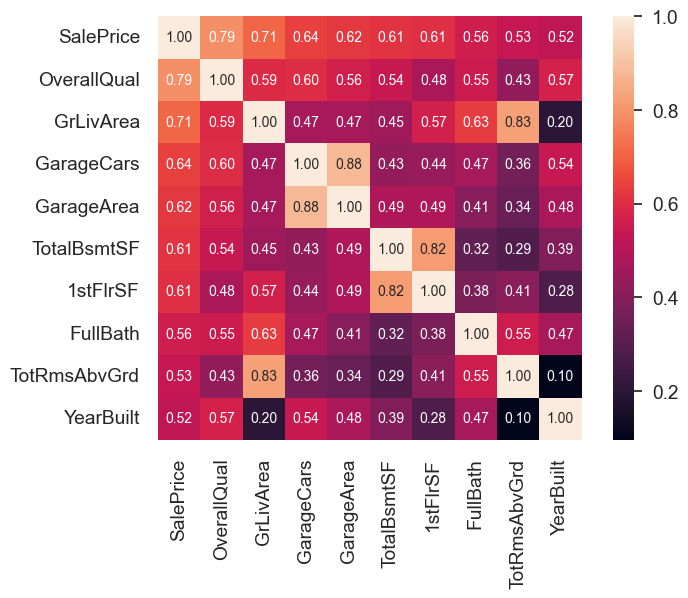

In [18]:
# Investigate the saleprice correlation matrix
k = 10 #number of variables for heatmap
corr_matrix = data.select_dtypes(include=np.number).corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [19]:
# load more datasets in different kaggle competitions to investigate the relationships between the target and the features
dataset1 = pd.read_csv("data/dataset1/Train.csv")
dataset2 = pd.read_csv("data/dataset2/Housing.csv")
dataset3 = pd.read_csv("data/dataset3/data.csv")

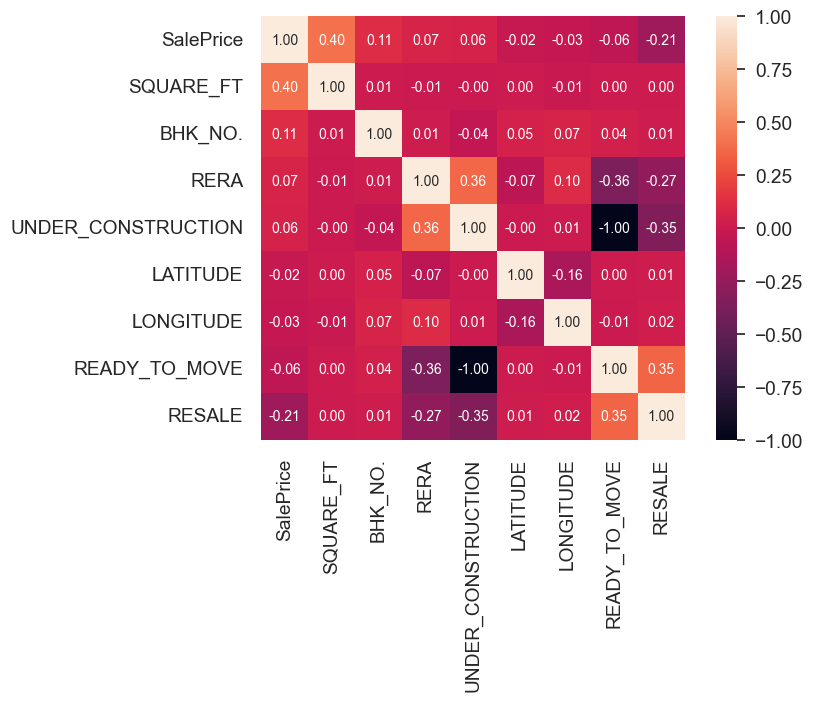

In [20]:
# Investigate dataset 1 to see the saleprice correlation matrix
k = 10 #number of variables for heatmap
dataset1.rename(columns={'TARGET(PRICE_IN_LACS)': 'SalePrice'}, inplace=True)
corr_matrix = dataset1.select_dtypes(include=np.number).corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

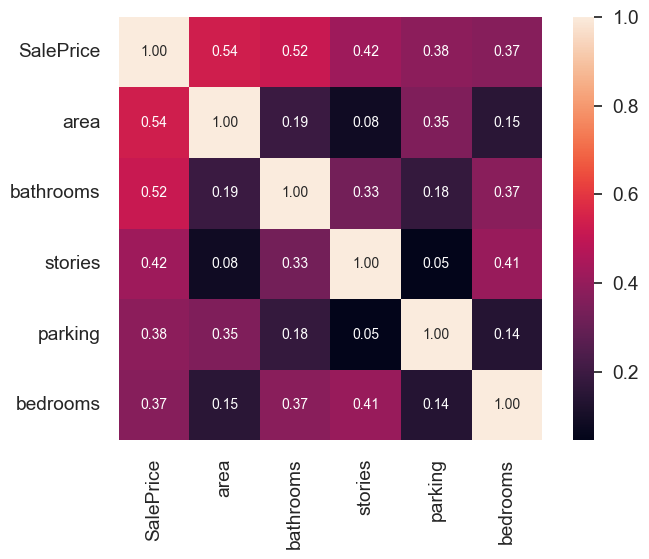

In [21]:
# Investigate dataset 2 to see the saleprice correlation matrix
k = 10 #number of variables for heatmap
dataset2.rename(columns={'price': 'SalePrice'}, inplace=True)
corr_matrix = dataset2.select_dtypes(include=np.number).corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

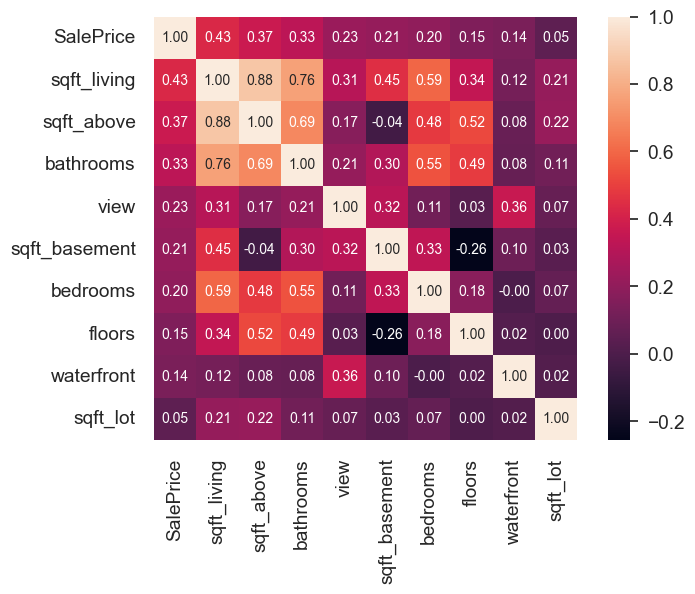

In [22]:
# Investigate dataset 3 to see the saleprice correlation matrix
k = 10 #number of variables for heatmap
dataset3.rename(columns={'price': 'SalePrice'}, inplace=True)
corr_matrix = dataset3.select_dtypes(include=np.number).corr()
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dataset3[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Data Cleaning

## Duplicate

In [23]:
# Drop duplicates- No duplicated row
X.duplicated().sum()

0

## Outliers

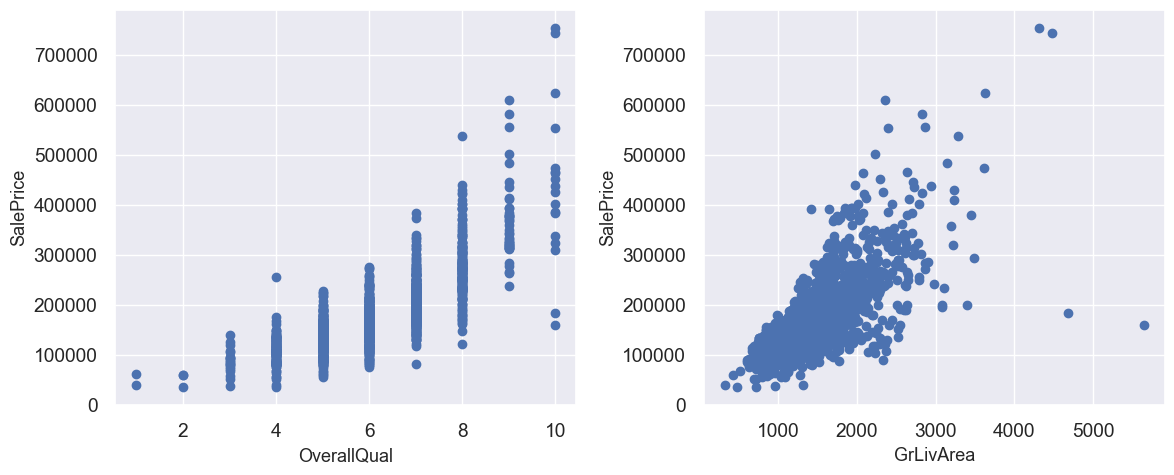

In [24]:
# Investigate outliers of features that have high relationship with Saleprice
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=data['OverallQual'], y=data['SalePrice'])
ax1.set_ylabel('SalePrice', fontsize=13)
ax1.set_xlabel('OverallQual', fontsize=13)

ax2.scatter(x=data['GrLivArea'], y=data['SalePrice'])
ax2.set_ylabel('SalePrice', fontsize=13)
ax2.set_xlabel('GrLivArea', fontsize=13)

fig.tight_layout()

plt.show()

In [25]:
# Deleting outliers
data = data.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

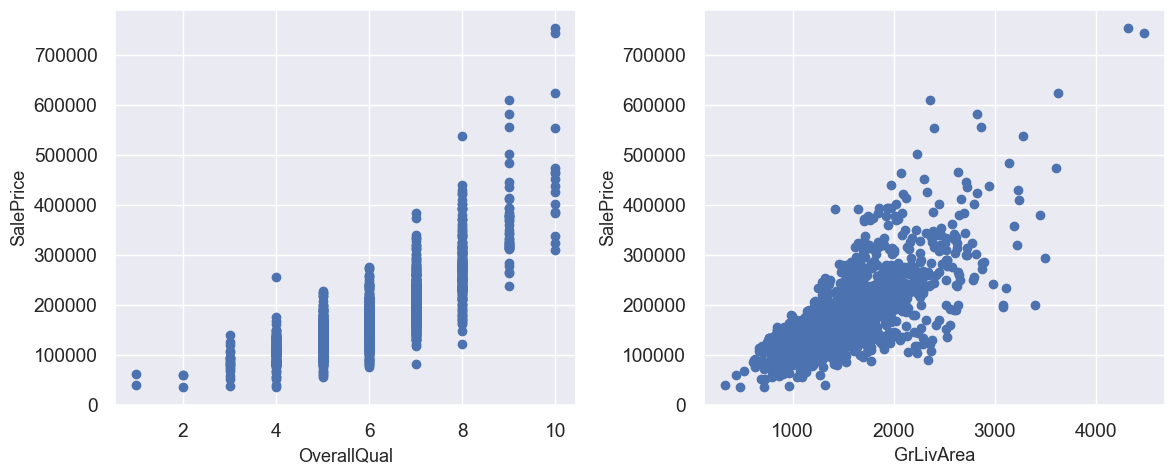

In [26]:
# Graph after deleting the outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(x=data['OverallQual'], y=data['SalePrice'])
ax1.set_ylabel('SalePrice', fontsize=13)
ax1.set_xlabel('OverallQual', fontsize=13)

ax2.scatter(x=data['GrLivArea'], y=data['SalePrice'])
ax2.set_ylabel('SalePrice', fontsize=13)
ax2.set_xlabel('GrLivArea', fontsize=13)

fig.tight_layout()

plt.show()

# Missing value

In [27]:
# Investigate the missing value
No_of_null = X.isna().sum().sort_values(ascending = False)
Percentage = X.isna().sum().sort_values(ascending = False)/X.shape[0]
Missing = pd.concat([No_of_null, Percentage], axis=1, keys=['Number', 'Percentage'])
Missing.head(10)

,Number,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In the document data description, it mentioned null values do have meaning in different columns. E.g. PoolQC, null valeus represent "No Pool".

In [28]:
# Ensure Proper Data Types

#MSSubClass=The building class
X['MSSubClass'] = X['MSSubClass'].apply(str)

#Year and month sold are transformed into categorical features.
X['YrSold'] = X['YrSold'].astype(str)
X['MoSold'] = X['MoSold'].astype(str)

# Feature Engineering

This function will be added later in the preprocessor pipline

In [29]:
def add_features(X):
    # Add four more features
    X["SqFtPerRoom"] = X["GrLivArea"] / (X["TotRmsAbvGrd"] +
                                        X["FullBath"] +
                                        X["HalfBath"] +
                                        X["KitchenAbvGr"])

    X['Total_Home_Quality'] = X['OverallQual'] + X['OverallCond']

    X['Total_Bathrooms'] = (X['FullBath'] + (0.5 * X['HalfBath']) +
                            X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath']))

    X["HighQualSF"] = X["1stFlrSF"] + X["2ndFlrSF"]

    # Ensure Proper Data Types
    X['MSSubClass'] = X['MSSubClass'].astype(str)
    X['YrSold'] = X['YrSold'].astype(str)
    X['MoSold'] = X['MoSold'].astype(str)

    return X

# Feature Transformations

In [30]:
# Define numerical features
feat_numerical = X.select_dtypes(include=["int64", "float64"]).columns

# Define ordinal features
feat_ordinal_dict = {
    # considers "missing" as "neutral"
    "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
    "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtFinType2": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "Electrical": ['missing', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
    "ExterCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "Functional": ['missing', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    "GarageCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['missing', 'Unf', 'RFn', 'Fin'],
    "GarageQual": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "HeatingQC": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
    "LandContour": ['missing', 'Low', 'Bnk', 'HLS', 'Lvl'],
    "LandSlope": ['missing', 'Sev', 'Mod', 'Gtl'],
    "LotShape": ['missing', 'IR3', 'IR2', 'IR1', 'Reg'],
    "PavedDrive": ['missing', 'N', 'P', 'Y'],
}
feat_ordinal = sorted(feat_ordinal_dict.keys()) # sort alphabetically
feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

# Define nominal features as the remaining ones (non numerical, non ordinal)
feat_nominal = sorted(list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))


Numerical Features:
- KNNImputer (filling the null values by mean)
- MinMaxScaler (Normalization, Scaling to range 0 and 1 )

Ordinal Features:
- KNNImputer (filling the null values by constant str value "missing")
- encoder_ordinal (OrdinalEncoder == Label Encoder)
- MinMaxScaler (Normalization, Scaling to range 0 and 1 )

Nomainal Features:
- SimpleImputer (filling the null values by mode)
- OneHotEncoder

In [31]:
# Define the preprocessor pipeline for numerical, ordinal, nomainal features
encoder_ordinal = OrdinalEncoder(
        categories=feat_ordinal_values_sorted,
        dtype= np.int64,
        handle_unknown="use_encoded_value",
        unknown_value=-1 # Considers unknown values as worse than "missing"
    )

preproc_ordinal = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="missing"),
        encoder_ordinal,
        MinMaxScaler()
    )

preproc_numerical = make_pipeline(
        KNNImputer(),
        MinMaxScaler()
    )

preproc_nominal = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

preproc_transformer = make_column_transformer(
        (preproc_numerical, feat_numerical),
        (preproc_ordinal, feat_ordinal),
        (preproc_nominal, feat_nominal),
        remainder="drop")

preprocessor = make_pipeline(preproc_transformer)
preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Alley', 'BldgType',
                                                   'CentralAir', 'Condition1',
                                                   'Condition2', 'Exterior1st',
                                                   'Exterior2nd', 'Fence',
                                                   'Foundation', 'GarageType',
                                                   'Heating', 'HouseStyle',
                                                   'LotConfig', 'MSSubClass',
                                                   'MSZoning', 'MasVnrType',
                                                   'MiscFeature', 'MoSold',
                                                   'Neighborhood', 'PoolQC',
                                                   'RoofMatl', 'RoofStyle',
                                                   'SaleCondition', 'SaleType',
                                                   'Street', 'Utilities',
                                                   'YrSold'])]))])

# Feature Selection

In [32]:
# Select the top features based on a scoring function
preproc_selector = SelectPercentile(
        mutual_info_regression,
        percentile=75, # keep only 75% of all features )
    )

# Preprocessor pipeline

In [33]:
def preprocessor(X):
    # Add features
    X = add_features(X)

    # Define ordinal features
    feat_ordinal_dict = {
        # considers "missing" as "neutral"
        "BsmtCond": ['missing', 'Po', 'Fa', 'TA', 'Gd'],
        "BsmtExposure": ['missing', 'No', 'Mn', 'Av', 'Gd'],
        "BsmtFinType1": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        "BsmtFinType2": ['missing', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
        "BsmtQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
        "Electrical": ['missing', 'Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'],
        "ExterCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "ExterQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
        "Fence": ['missing', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
        "FireplaceQu": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "Functional": ['missing', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
        "GarageCond": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "GarageFinish": ['missing', 'Unf', 'RFn', 'Fin'],
        "GarageQual": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "HeatingQC": ['missing', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
        "KitchenQual": ['missing', 'Fa', 'TA', 'Gd', 'Ex'],
        "LandContour": ['missing', 'Low', 'Bnk', 'HLS', 'Lvl'],
        "LandSlope": ['missing', 'Sev', 'Mod', 'Gtl'],
        "LotShape": ['missing', 'IR3', 'IR2', 'IR1', 'Reg'],
        "PavedDrive": ['missing', 'N', 'P', 'Y'],
        "PoolQC": ['missing', 'Fa', 'Gd', 'Ex'],
    }

    feat_ordinal = sorted(feat_ordinal_dict.keys()) # sort alphabetically
    feat_ordinal_values_sorted = [feat_ordinal_dict[i] for i in feat_ordinal]

    # Define feat_numerical features
    feat_numerical = X.select_dtypes(include=["int64", "float64"]).columns

    # Define nominal features
    feat_nominal = sorted(list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))


    encoder_ordinal = OrdinalEncoder(
        categories=feat_ordinal_values_sorted,
        dtype= np.int64,
        handle_unknown="use_encoded_value",
        unknown_value=-1 # Considers unknown values as worse than "missing"
    )

    preproc_ordinal = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="missing"),
        encoder_ordinal,
        MinMaxScaler()
    )

    preproc_numerical = make_pipeline(
        KNNImputer(),
        MinMaxScaler()
    )

    preproc_nominal = make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

    preproc_transformer = make_column_transformer(
        (preproc_numerical, feat_numerical),
        (preproc_ordinal, feat_ordinal),
        (preproc_nominal, feat_nominal),
        remainder="drop")

    preproc_selector = SelectPercentile(
        mutual_info_regression,
        percentile=75, # keep only xx% of all features )
    )
    preprocessor = make_pipeline(
        preproc_transformer,
        preproc_selector
    )
    return preprocessor

preprocessor = preprocessor(X)
preprocessor

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', '...
                                                   'Exterior2nd', 'Foundation',
                                                   'GarageType', 'Heating',
                                                   'HouseStyle', 'LotConfig',
                                                   'MSSubClass', 'MSZoning',
                                                   'MasVnrType', 'MiscFeature',
                                                   'MoSold', 'Neighborhood',
                                                   'RoofMatl', 'RoofStyle',
                                                   'SaleCondition', 'SaleType',
                                                   'Street', 'Utilities',
                                                   'YrSold'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=75,
                                  score_func=<function mutual_info_regression at 0x000001B7363DA3B0>))])

# Target Transformation 

In [34]:
# Descriptive statistics
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

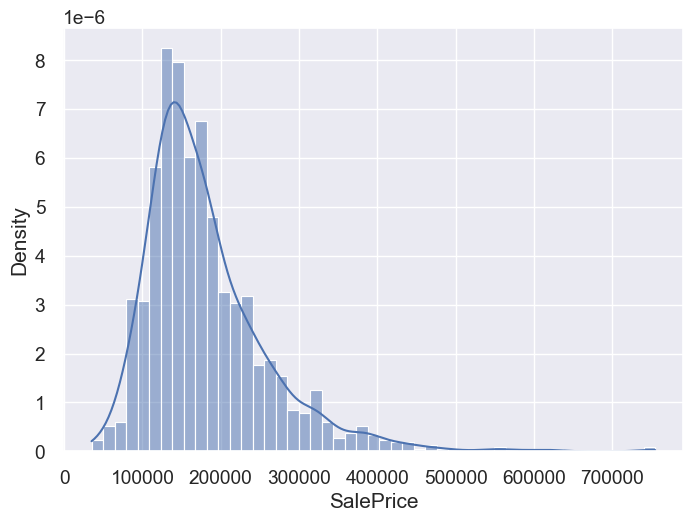

In [35]:
# Density distribution plots
sns.histplot(y, kde=True, stat="density")

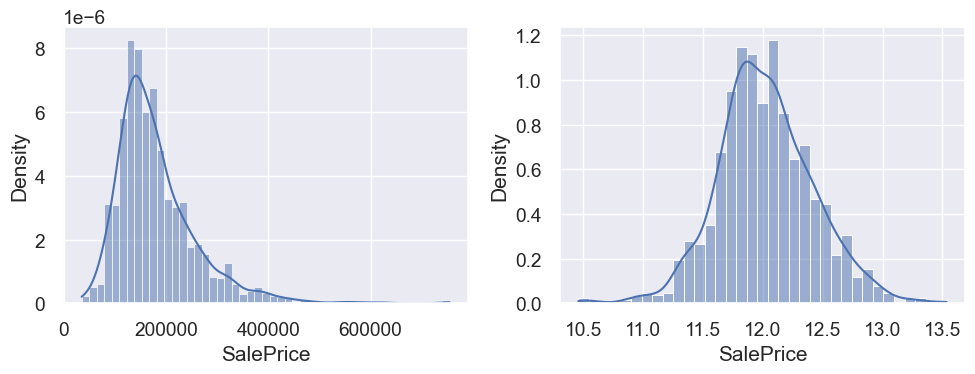

In [36]:
# Target "SalePrice" after Log-transformed
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(y, kde=True, stat="density")

plt.subplot(1,2,2)
sns.histplot(np.log1p(y), kde=True, stat="density")

plt.tight_layout()

In [37]:
# logarithmic transformation
y = np.log1p(y)
y.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

# Model Selection

In [38]:
# Set up the pycaret
preproc_X = preprocessor.fit_transform(X,y)
_ = setup(data=pd.concat([pd.DataFrame(preproc_X), y], axis=1), target='SalePrice')

,Description,Value
0,Session id,4044
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 187)"
4,Transformed data shape,"(1460, 187)"
5,Transformed train set shape,"(1021, 187)"
6,Transformed test set shape,"(439, 187)"
7,Numeric features,186
8,Preprocess,True
9,Imputation type,simple


In [39]:
# Find multiple regression models based on their performance
models = compare_models(sort='rmse', n_select=6, verbose=True)
models

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:09:42
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


[BayesianRidge(),
 Ridge(random_state=4044),
 LGBMRegressor(random_state=4044),
 GradientBoostingRegressor(random_state=4044),
 ExtraTreesRegressor(n_jobs=-1, random_state=4044),
 RandomForestRegressor(n_jobs=-1, random_state=4044)]

# Model Evaluation

In [40]:
# Train/Val Split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3)

# Apply these transformations to both the training set and the validation set.
preproc_Xtrain = preprocessor.fit_transform(X_train,y_train)
preproc_Xvalidation = preprocessor.transform(X_validation)

print(f"X train and X validation dataset size: {X_train.shape}, {X_validation.shape}")
print(f"preproc X train and X validation dataset size: {preproc_Xtrain.shape}, {preproc_Xvalidation.shape}")

X train and X validation dataset size: (1022, 83), (438, 83)
preproc X train and X validation dataset size: (1022, 181), (438, 181)


In [41]:
# Define the scoring
rmse = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred)**0.5)
rmse_neg = make_scorer(lambda y_true, y_pred: -1 * mean_squared_error(y_true, y_pred)**0.5)

In [42]:
# Loop through the list of models and calculate cross-validated RMSE
for model in models:
    scores = cross_val_score(model, preproc_Xtrain, y_train, cv=5, scoring=rmse)
    rmse_mean = scores.mean()
    print(f"Model: {model.__class__.__name__}, RMSE: {rmse_mean}")

Model: BayesianRidge, RMSE: 0.12931096112960078
Model: Ridge, RMSE: 0.13059789813863698
Model: LGBMRegressor, RMSE: 0.13672222105695653
Model: GradientBoostingRegressor, RMSE: 0.13556371850274923
Model: ExtraTreesRegressor, RMSE: 0.1434602694390045
Model: RandomForestRegressor, RMSE: 0.14493953990806263


In [43]:
# Loop through the list of models and calculate RMSE on the validation set
for model in models:
    model.fit(preproc_Xtrain, y_train)  # Train the model on the training set
    y_pred = model.predict(preproc_Xvalidation)  # Make predictions on the validation set
    rmse = np.sqrt(mean_squared_error(y_validation, y_pred))  # Calculate RMSE
    print(f"Model: {model.__class__.__name__}, RMSE: {rmse}")

Model: BayesianRidge, RMSE: 0.15225669796365593
Model: Ridge, RMSE: 0.15349747308994177
Model: LGBMRegressor, RMSE: 0.12576502726376756
Model: GradientBoostingRegressor, RMSE: 0.11300259482065482
Model: ExtraTreesRegressor, RMSE: 0.13447403520545334
Model: RandomForestRegressor, RMSE: 0.13554481153724493


# Hyperparameter optimization

In [44]:
# Define the models
models = [
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("LGBMRegressor", LGBMRegressor()),
    ("BayesianRidge", BayesianRidge()),
    ("Ridge", Ridge()),
    ("ExtraTreesRegressor", ExtraTreesRegressor()),
    ("RandomForestRegressor", RandomForestRegressor())
]

# Define the parameter grids for each model
param_grids = {
    "GradientBoostingRegressor": {
        "learning_rate": [0.1, 0.01, 0.001],
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5]
    },
    "LGBMRegressor": {
        "learning_rate": [0.1, 0.01, 0.001],
        "n_estimators": [100, 200, 300],
        "num_leaves": [31, 40, 50]
    },
    "BayesianRidge": {
        "alpha_1": [1e-6, 1e-7, 1e-8],
        "alpha_2": [1e-6, 1e-7, 1e-8],
        "lambda_1": [1e-6, 1e-7, 1e-8],
        "lambda_2": [1e-6, 1e-7, 1e-8]
    },
    "Ridge": {
        "alpha": [0.1, 0.01, 0.001]
    },
    "ExtraTreesRegressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10]
    },
    "RandomForestRegressor": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10]
    }
}

# Define the scoring function
rmse = make_scorer(lambda y_true, y_pred: sqrt(mean_squared_error(y_true, y_pred)))

# Perform hyperparameter tuning for each model
best_models = {}

for name, model in models:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring=rmse_neg, cv=5)
    grid_search.fit(preproc_Xtrain, y_train)
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    print("Model: {}, Best Params: {}".format(name, grid_search.best_params_))
    print("Model: {}, Best Score: {}".format(name, -grid_search.best_score_))

Model: GradientBoostingRegressor, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Model: GradientBoostingRegressor, Best Score: 0.13481653527129225
Model: LGBMRegressor, Best Params: {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 40}
Model: LGBMRegressor, Best Score: 0.13584905779489154
Model: BayesianRidge, Best Params: {'alpha_1': 1e-08, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-08}
Model: BayesianRidge, Best Score: 0.1293109536253175
Model: Ridge, Best Params: {'alpha': 0.1}
Model: Ridge, Best Score: 0.13882872961990747
Model: ExtraTreesRegressor, Best Params: {'max_depth': None, 'n_estimators': 300}
Model: ExtraTreesRegressor, Best Score: 0.14179402420291445
Model: RandomForestRegressor, Best Params: {'max_depth': None, 'n_estimators': 200}
Model: RandomForestRegressor, Best Score: 0.14449976362024047


# Ensembling Models

In [45]:
gr_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
lgbm_params = {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
br_params = {'alpha_1': 1e-08, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-08}
r_params = {'alpha': 0.1}
et_params = {'max_depth': None, 'n_estimators': 300}
rt_params = {'max_depth': None, 'n_estimators': 200}

# Define the models
models = [
    ("GradientBoostingRegressor", GradientBoostingRegressor(**gr_params)),
    ("LGBMRegressor", LGBMRegressor(**lgbm_params)),
    ("BayesianRidge", BayesianRidge(**br_params)),
    ("Ridge", Ridge()),
    ("ExtraTreesRegressor", ExtraTreesRegressor(**et_params)),
    ("RandomForestRegressor", RandomForestRegressor(**rt_params))
]

# Train the models
trained_models = {}

for name, model in models:
    model.fit(preproc_Xtrain, y_train)
    trained_models[name] = model
    print(f"Model: {name}, RMSE: {np.sqrt(mean_squared_error(y_validation, model.predict(preproc_Xvalidation)))}")

Model: GradientBoostingRegressor, RMSE: 0.11140786753117574
Model: LGBMRegressor, RMSE: 0.12576502726376756
Model: BayesianRidge, RMSE: 0.15225669091683028
Model: Ridge, RMSE: 0.15349747308994177
Model: ExtraTreesRegressor, RMSE: 0.13271135159673736
Model: RandomForestRegressor, RMSE: 0.13333832691667882


In [46]:
# Preprocess the test dataset
preproc_Xtest = add_features(test)
preproc_Xtest = preprocessor.transform(test)

# Ensemble the models for predictions
final_predictions = (
    0.2 * np.exp(trained_models['GradientBoostingRegressor'].predict(preproc_Xtest)) +
    0.1 * np.exp(trained_models['LGBMRegressor'].predict(preproc_Xtest)) +
    0.4 * np.exp(trained_models['BayesianRidge'].predict(preproc_Xtest)) +
    0.1 * np.exp(trained_models['Ridge'].predict(preproc_Xtest)) +
    0.1 * np.exp(trained_models['ExtraTreesRegressor'].predict(preproc_Xtest)) +
    0.1 * np.exp(trained_models['RandomForestRegressor'].predict(preproc_Xtest))
)

# Submission
Ensemble_submission = pd.DataFrame(test_id,columns=['Id'])
Ensemble_submission['SalePrice'] = pd.DataFrame(final_predictions)
Ensemble_submission.to_csv(r'submission/Ensemble_submission.csv', index=False, header=True)
Ensemble_submission

# Kaggle public score: 0.12591

,Id,SalePrice
0,1461,124002.990322
1,1462,159127.262414
2,1463,179975.974997
3,1464,192822.173065
4,1465,186381.639974
...,...,...
1454,2915,85484.514326
1455,2916,79139.216876
1456,2917,160830.322162
1457,2918,118412.721817


### Export the Ensembling Models to a pickle file

In [47]:
import pickle

gr_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
lgbm_params = {'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}
br_params = {'alpha_1': 1e-08, 'alpha_2': 1e-06, 'lambda_1': 1e-06, 'lambda_2': 1e-08}
r_params = {'alpha': 0.1}
et_params = {'max_depth': None, 'n_estimators': 300}
rt_params = {'max_depth': None, 'n_estimators': 200}

# Define the models
models = [
    ("GradientBoostingRegressor", GradientBoostingRegressor(**gr_params)),
    ("LGBMRegressor", LGBMRegressor(**lgbm_params)),
    ("BayesianRidge", BayesianRidge(**br_params)),
    ("Ridge", Ridge()),
    ("ExtraTreesRegressor", ExtraTreesRegressor(**et_params)),
    ("RandomForestRegressor", RandomForestRegressor(**rt_params))
]

# Train the models
trained_models_full = {}

for name, model in models:
    model.fit(preproc_X, y)
    trained_models_full[name] = model

# Export the trained_models dictionary
with open('trained_models_full.pkl', 'wb') as file:
    pickle.dump(trained_models_full, file)

# Neural Network

## Feedforward Neural Network (FNN)

In [48]:
# Create a Feedforward Neural Network (FNN) neural network model
def initialize_model():
    model = Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=preproc_Xtrain.shape[1]))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))  # No activation function for the output layer in regression

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

NN_model = initialize_model()

In [49]:
# Train the model
history = NN_model.fit(preproc_Xtrain, y_train,validation_data = (preproc_Xvalidation, y_validation), batch_size=8, epochs=50)

Epoch 1/50
128/128 [==============================] - 1s 3ms/step - loss: 19.2131 - val_loss: 0.4311
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 0.3133 - val_loss: 0.2383
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1833 - val_loss: 0.1622
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 0.1261 - val_loss: 0.1287
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0965 - val_loss: 0.1056
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0822 - val_loss: 0.0954
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0660 - val_loss: 0.0907
Epoch 8/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0613 - val_loss: 0.0970
Epoch 9/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0491 - val_loss: 0.0728
Epoch 10/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.068

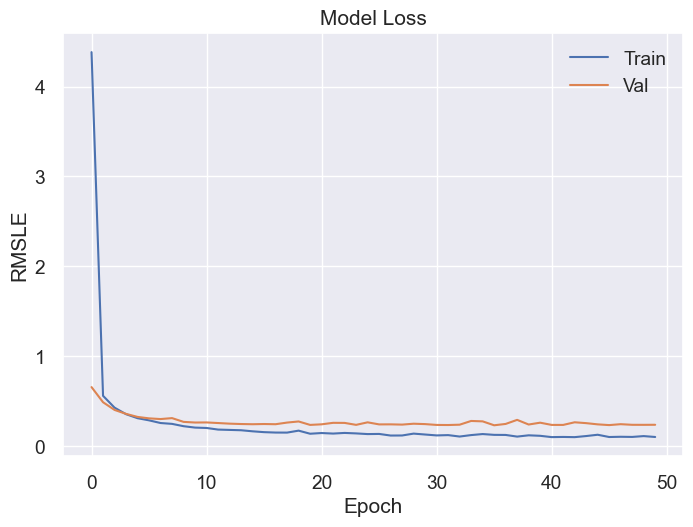

In [50]:
# Evaluate the NN model performance
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

plot_history(history)

In [51]:
# Preprocess the test dataset
preproc_Xtest = add_features(test)
preproc_Xtest = preprocessor.transform(test)

# Use the model to predict test dataset
results_NN = NN_model.predict(preproc_Xtest)

# Submission
NN_submission = pd.DataFrame(test_id,columns=['Id'])
NN_submission['SalePrice'] = pd.DataFrame(np.exp(results_NN))
NN_submission.to_csv(r'submission/NN_submission.csv', index=False, header=True)
NN_submission

# Kaggle public score: 0.21667

46/46 [==============================] - 0s 956us/step


,Id,SalePrice
0,1461,110747.414062
1,1462,163085.875000
2,1463,192364.562500
3,1464,202621.734375
4,1465,182045.484375
...,...,...
1454,2915,83061.718750
1455,2916,79537.523438
1456,2917,167339.109375
1457,2918,102353.429688


## Long Short-Term Memory (LSTM)

In [52]:
# Create a Long Short-Term Memory (LSTM) neural network model
def initialize_model():
    model = Sequential()
    model.add(layers.LSTM(128, return_sequences=True, input_shape=(preproc_Xtrain.shape[1], 1)))
    model.add(layers.Dropout(0.2))  # Apply dropout for regularization
    model.add(layers.LSTM(64, return_sequences=False))
    model.add(layers.Dense(25, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

LSTM_model = initialize_model()

In [53]:
# Train the model
history1 = LSTM_model.fit(preproc_Xtrain, y_train,validation_data = (preproc_Xvalidation, y_validation), batch_size=8, epochs=50)

Epoch 1/50
128/128 [==============================] - 25s 165ms/step - loss: 14.7287 - val_loss: 0.1639
Epoch 2/50
128/128 [==============================] - 21s 166ms/step - loss: 0.1597 - val_loss: 0.1645
Epoch 3/50
128/128 [==============================] - 22s 170ms/step - loss: 0.1606 - val_loss: 0.1638
Epoch 4/50
128/128 [==============================] - 21s 162ms/step - loss: 0.1616 - val_loss: 0.1640
Epoch 5/50
128/128 [==============================] - 22s 174ms/step - loss: 0.1626 - val_loss: 0.1738
Epoch 6/50
128/128 [==============================] - 22s 171ms/step - loss: 0.1646 - val_loss: 0.1671
Epoch 7/50
128/128 [==============================] - 23s 180ms/step - loss: 0.1684 - val_loss: 0.1701
Epoch 8/50
128/128 [==============================] - 22s 173ms/step - loss: 0.1644 - val_loss: 0.1861
Epoch 9/50
128/128 [==============================] - 22s 173ms/step - loss: 0.1662 - val_loss: 0.1639
Epoch 10/50
128/128 [==============================] - 22s 170ms/step - 

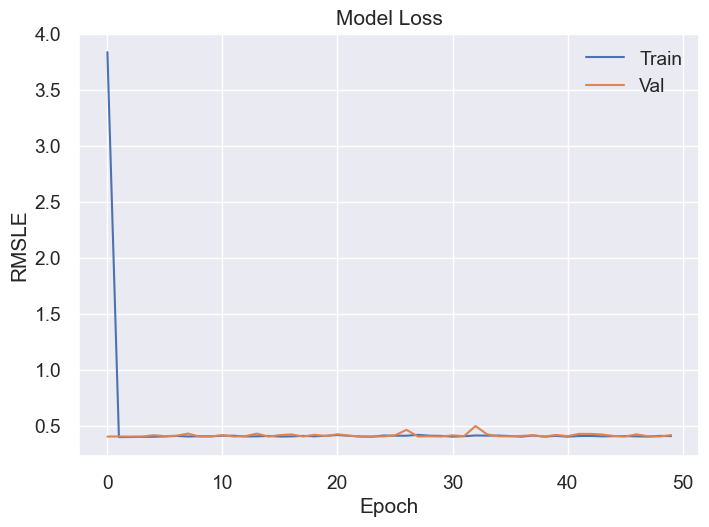

In [54]:
# Evaluate the LSTM model performance
def plot_history(history):
    plt.plot(np.sqrt(history.history['loss']))
    plt.plot(np.sqrt(history.history['val_loss']))
    plt.title('Model Loss')
    plt.ylabel('RMSLE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

plot_history(history1)

In [55]:
# Preprocess the test dataset
preproc_Xtest = add_features(test)
preproc_Xtest = preprocessor.transform(test)

# Use the LSTM model to predict test dataset
results_LSTM = LSTM_model.predict(preproc_Xtest)

# Submission
LSTM_submission = pd.DataFrame(test_id,columns=['Id'])
LSTM_submission['SalePrice'] = pd.DataFrame(np.exp(results_LSTM))
LSTM_submission.to_csv(r'submission/LSTM_submission.csv', index=False, header=True)

# Kaggle public score: -

46/46 [==============================] - 4s 76ms/step
